SPEECH EMOTION RECOGNITION

STEP 1: DATA COLLECTION

In [1]:
import opendatasets as od
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import imblearn
import keras
import tensorflow as tf
import matplotlib.pyplot as plt    
%matplotlib inline

from IPython.display import Audio
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout,LSTM


In [2]:
od.download('https://www.kaggle.com/datasets/ejlok1/cremad')
od.download('https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio')
od.download('https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee')
od.download('https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess')


Skipping, found downloaded files in ".\cremad" (use force=True to force download)
Skipping, found downloaded files in ".\ravdess-emotional-speech-audio" (use force=True to force download)
Skipping, found downloaded files in ".\surrey-audiovisual-expressed-emotion-savee" (use force=True to force download)
Skipping, found downloaded files in ".\toronto-emotional-speech-set-tess" (use force=True to force download)


In [4]:
folder_path="D:/speech_recognition/ravdess/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
x= os.listdir(folder_path)
emotion=[]
file_path=[]
for i in x:
  filename= os.listdir(folder_path+ i)
  for f in filename:
    filename_identifiers = f.split('.')[0].split('-')
    emotion.append(int(filename_identifiers[2]))
    file_path.append(folder_path + i + '/' + f)
RAVDESS_df = pd.DataFrame(emotion)
RAVDESS_df = RAVDESS_df.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAVDESS_df.columns = ['emotion']
RAVDESS_df = pd.concat([RAVDESS_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)

In [5]:
RAVDESS_df

,emotion,path
0,neutral,D:/speech_recognition/ravdess/ravdess-emotiona...
1,neutral,D:/speech_recognition/ravdess/ravdess-emotiona...
2,neutral,D:/speech_recognition/ravdess/ravdess-emotiona...
3,neutral,D:/speech_recognition/ravdess/ravdess-emotiona...
4,calm,D:/speech_recognition/ravdess/ravdess-emotiona...
...,...,...
1435,surprise,D:/speech_recognition/ravdess/ravdess-emotiona...
1436,surprise,D:/speech_recognition/ravdess/ravdess-emotiona...
1437,surprise,D:/speech_recognition/ravdess/ravdess-emotiona...
1438,surprise,D:/speech_recognition/ravdess/ravdess-emotiona...


In [6]:
folder_path="D:/speech_recognition/tess/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/"
x= os.listdir(folder_path)
emotion=[]
file_path=[]



for i in x:
    fname = os.listdir(folder_path + i)   
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        file_path.append(folder_path + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['emotion'])
TESS_df = pd.concat([TESS_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)

In [7]:
TESS_df

,emotion,path
0,angry,D:/speech_recognition/tess/toronto-emotional-s...
1,angry,D:/speech_recognition/tess/toronto-emotional-s...
2,angry,D:/speech_recognition/tess/toronto-emotional-s...
3,angry,D:/speech_recognition/tess/toronto-emotional-s...
4,angry,D:/speech_recognition/tess/toronto-emotional-s...
...,...,...
2795,sad,D:/speech_recognition/tess/toronto-emotional-s...
2796,sad,D:/speech_recognition/tess/toronto-emotional-s...
2797,sad,D:/speech_recognition/tess/toronto-emotional-s...
2798,sad,D:/speech_recognition/tess/toronto-emotional-s...


In [8]:
folder_path="D:/speech_recognition/savee/surrey-audiovisual-expressed-emotion-savee/ALL/"
x= os.listdir(folder_path)
emotion=[]
file_path=[]


for file in x:
    file_path.append(folder_path + file)
    y = file.split('_')[1]
    emo = y[-8:-6]
    if emo=='a':
        emotion.append('angry')
    elif emo=='d':
        emotion.append('disgust')
    elif emo=='f':
        emotion.append('fear')
    elif emo=='h':
        emotion.append('happy')
    elif emo=='n':
        emotion.append('neutral')
    elif emo=='sa':
        emotion.append('sad')
    else:
        emotion.append('surprise')
        

SAVEE_df = pd.DataFrame(emotion, columns=['emotion'])
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(file_path, columns=['path'])], axis=1)

In [9]:
SAVEE_df

,emotion,path
0,angry,D:/speech_recognition/savee/surrey-audiovisual...
1,angry,D:/speech_recognition/savee/surrey-audiovisual...
2,angry,D:/speech_recognition/savee/surrey-audiovisual...
3,angry,D:/speech_recognition/savee/surrey-audiovisual...
4,angry,D:/speech_recognition/savee/surrey-audiovisual...
...,...,...
475,surprise,D:/speech_recognition/savee/surrey-audiovisual...
476,surprise,D:/speech_recognition/savee/surrey-audiovisual...
477,surprise,D:/speech_recognition/savee/surrey-audiovisual...
478,surprise,D:/speech_recognition/savee/surrey-audiovisual...


In [10]:
folder_path="D:/speech_recognition/cremad/cremad/AudioWAV/"
x= os.listdir(folder_path)
emotion=[]
file_path=[]

for file in x:
    file_path.append(folder_path + file)
    filename_identifiers=file.split('_')
    if filename_identifiers[2] == 'SAD':
        emotion.append('sad')
    elif filename_identifiers[2] == 'ANG':
        emotion.append('angry')
    elif filename_identifiers[2] == 'DIS':
        emotion.append('disgust')
    elif filename_identifiers[2] == 'FEA':
        emotion.append('fear')
    elif filename_identifiers[2] == 'HAP':
        emotion.append('happy')
    elif filename_identifiers[2] == 'NEU':
        emotion.append('neutral')
    else:
        emotion.append('Unknown')
        

CREMA_df = pd.DataFrame(emotion, columns=['emotion'])
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(file_path, columns = ['path'])],axis=1)

In [11]:
CREMA_df

,emotion,path
0,angry,D:/speech_recognition/cremad/cremad/AudioWAV/1...
1,disgust,D:/speech_recognition/cremad/cremad/AudioWAV/1...
2,fear,D:/speech_recognition/cremad/cremad/AudioWAV/1...
3,happy,D:/speech_recognition/cremad/cremad/AudioWAV/1...
4,neutral,D:/speech_recognition/cremad/cremad/AudioWAV/1...
...,...,...
7437,disgust,D:/speech_recognition/cremad/cremad/AudioWAV/1...
7438,fear,D:/speech_recognition/cremad/cremad/AudioWAV/1...
7439,happy,D:/speech_recognition/cremad/cremad/AudioWAV/1...
7440,neutral,D:/speech_recognition/cremad/cremad/AudioWAV/1...


In [12]:
df_combined = pd.concat([RAVDESS_df, CREMA_df, TESS_df, SAVEE_df], axis = 0)
df_combined.to_csv("combined_data.csv",index=False)
df_combined

,emotion,path
0,neutral,D:/speech_recognition/ravdess/ravdess-emotiona...
1,neutral,D:/speech_recognition/ravdess/ravdess-emotiona...
2,neutral,D:/speech_recognition/ravdess/ravdess-emotiona...
3,neutral,D:/speech_recognition/ravdess/ravdess-emotiona...
4,calm,D:/speech_recognition/ravdess/ravdess-emotiona...
...,...,...
475,surprise,D:/speech_recognition/savee/surrey-audiovisual...
476,surprise,D:/speech_recognition/savee/surrey-audiovisual...
477,surprise,D:/speech_recognition/savee/surrey-audiovisual...
478,surprise,D:/speech_recognition/savee/surrey-audiovisual...


<AxesSubplot: >

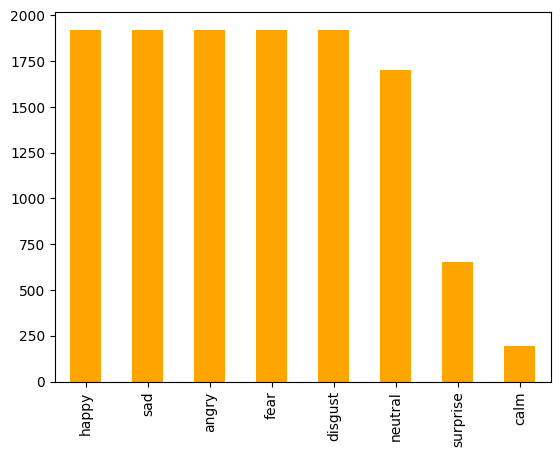

In [17]:
df_combined.emotion.value_counts().plot(kind='bar', color='orange')

In [27]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

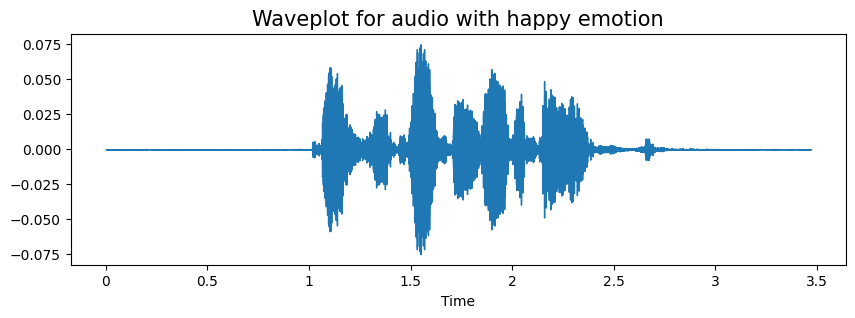

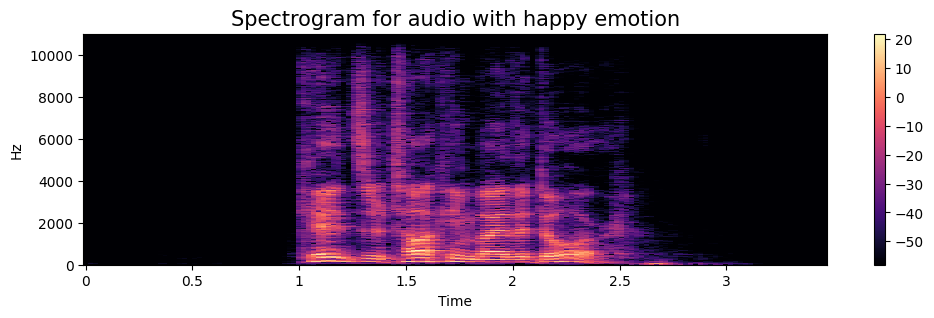

In [28]:
emotion='happy'
path = np.array(df_combined.path[df_combined.emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

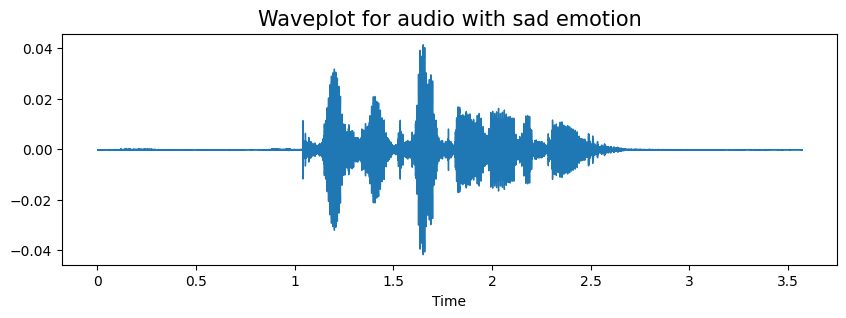

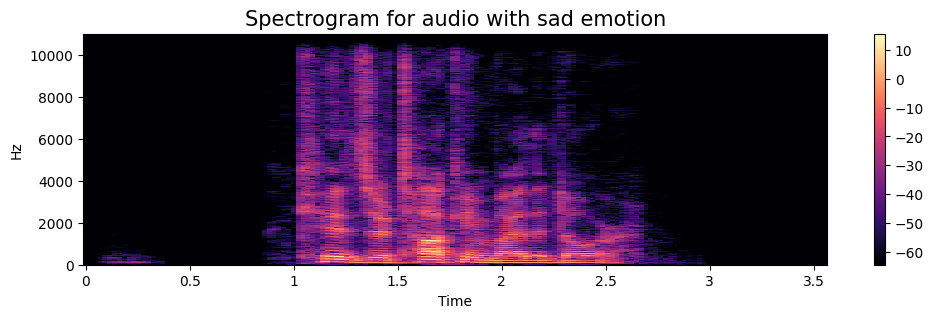

In [29]:
emotion='sad'
path = np.array(df_combined.path[df_combined.emotion==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

STEP 2: DATA PREPROCESSING

In [31]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

STEP 3: FEATURE EXTRACTION

In [40]:
def extract_features(data,sample_rate):
    
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result=np.hstack((result, zcr)) 

    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft)) 

    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) 

    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) 

    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))
    
    return result

def get_features(path):
    
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)
    
    noise_data = noise(data)
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2)) 
    
    new_data = stretch(data)
    data_stretch_pitch = pitch(new_data, sample_rate)
    res3 = extract_features(data_stretch_pitch , sample_rate)
    result = np.vstack((result, res3)) 

    return result

In [43]:
X, Y = [], []
for path, emotion in zip(df_combined.path, df_combined.emotion):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        Y.append(emotion)

C:\Users\Manav\AppData\Local\Temp\ipykernel_18952\4130844094.py:7: FutureWarning: Pass rate=0.8 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.time_stretch(data, rate)
C:\Users\Manav\AppData\Local\Temp\ipykernel_18952\4130844094.py:14: FutureWarning: Pass sr=22050, n_steps=0.7 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)


In [45]:
final_df = pd.DataFrame(X)
final_df['emotion'] = Y
final_df.to_csv('features.csv', index=False)
final_df

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,emotion
0,0.283226,0.739174,0.760110,0.738748,0.712194,0.687986,0.667279,0.694000,0.742275,0.762594,...,4.312694e-06,3.293364e-06,2.149553e-06,2.260914e-06,4.562520e-06,4.985617e-06,1.324619e-06,1.469305e-07,3.053402e-09,neutral
1,0.313562,0.792785,0.808453,0.804014,0.809443,0.795844,0.680110,0.676340,0.732202,0.773084,...,4.319922e-05,4.274221e-05,4.422310e-05,4.362371e-05,4.463737e-05,4.423355e-05,4.193582e-05,4.079745e-05,4.115206e-05,neutral
2,0.181467,0.629995,0.730929,0.743651,0.680889,0.670727,0.673700,0.669033,0.709932,0.745144,...,8.582505e-07,9.570446e-07,7.741540e-07,5.212421e-07,3.252106e-07,4.883136e-07,2.353670e-07,2.240905e-08,9.753157e-11,neutral
3,0.254530,0.676571,0.724970,0.725722,0.668644,0.645344,0.671471,0.631493,0.681748,0.709889,...,6.987414e-06,7.038922e-06,6.659573e-06,6.937638e-06,1.117492e-05,5.767251e-06,2.024577e-06,1.944936e-07,2.701240e-09,neutral
4,0.328170,0.806506,0.835795,0.805745,0.793371,0.803475,0.692103,0.666355,0.719961,0.751332,...,1.214750e-04,1.338774e-04,1.312335e-04,1.296812e-04,1.294307e-04,1.282689e-04,1.179814e-04,1.161904e-04,1.235450e-04,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36481,0.248390,0.712063,0.725394,0.730928,0.716899,0.721837,0.659402,0.629772,0.654697,0.644709,...,4.356217e-04,4.617733e-04,4.443517e-04,4.763541e-04,4.783442e-04,4.423726e-04,4.647830e-04,4.604989e-04,4.486349e-04,surprise
36482,0.045830,0.508613,0.574411,0.589937,0.565149,0.508394,0.532448,0.543339,0.516656,0.543557,...,1.824383e-07,6.677096e-08,4.835042e-08,3.871718e-08,3.323877e-08,2.722083e-08,1.436905e-08,6.949060e-09,5.050349e-09,surprise
36483,0.042526,0.603875,0.563046,0.559025,0.539222,0.574622,0.614927,0.654881,0.624225,0.590965,...,6.467074e-08,2.076177e-08,1.028410e-08,8.832544e-09,7.857002e-09,5.115117e-09,1.711258e-09,2.714505e-10,9.340081e-11,surprise
36484,0.166106,0.675879,0.665606,0.661218,0.654687,0.685385,0.662428,0.669728,0.660230,0.636050,...,1.209598e-04,1.191657e-04,1.242453e-04,1.256481e-04,1.194050e-04,1.241329e-04,1.185684e-04,1.248669e-04,1.198789e-04,surprise


In [46]:
X = final_df.drop(['emotion'], axis=1)
feature_names = list(X.columns)
X = X.values
labels = np.sort(np.unique(final_df.emotion.values))
index = {}
val = {}
for i, j in enumerate(labels):
    index[j] = i
    val[i] = j
y = np.array([index[x] for x in final_df.emotion.values])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [54]:
oversample= ADASYN(sampling_strategy='minority')
X_ada, y_ada = oversample.fit_resample(X_train, y_train )

STEP 4: SVM CLASSIFIER

In [55]:
svclassifier = SVC()
svclassifier.fit(X_ada, y_ada)
y_pred = svclassifier.predict(X_test)
acc = float(accuracy_score(y_test,y_pred))*100
print("Accuracy Score is:", acc)

Accuracy Score is: 41.40539355404517


c:\Users\Manav\anaconda3\envs\tf2.11\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


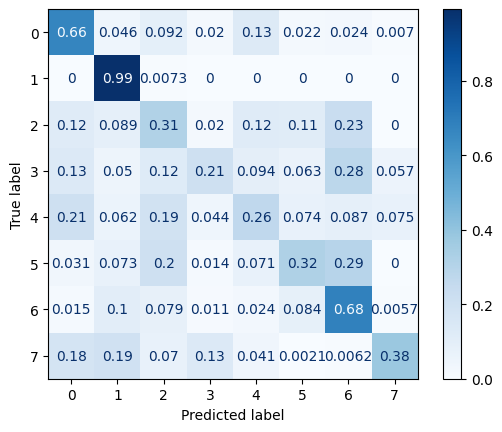

In [61]:
matrix = plot_confusion_matrix(svclassifier,X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.show(matrix)
plt.show()

STEP 5: DECISION TREE CLASSIFIER

In [57]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_ada, y_ada)
y_pred = decision_tree.predict(X_test)
acc = float(accuracy_score(y_test,y_pred))*100
print("Accuracy Score is:", acc)

Accuracy Score is: 52.37886428414821


c:\Users\Manav\anaconda3\envs\tf2.11\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


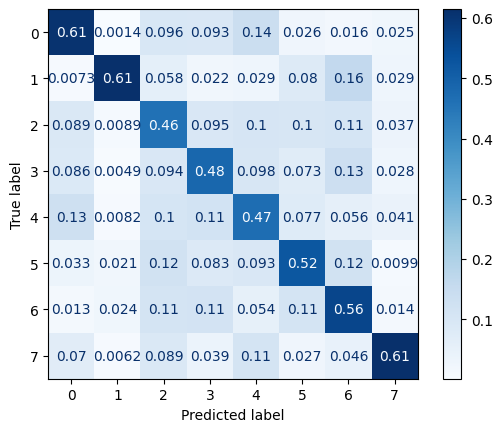

In [58]:
matrix = plot_confusion_matrix(decision_tree,X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.show(matrix)
plt.show()

STEP 6: RECURRENT NEURAL NETWORK

In [86]:
X = final_df.iloc[: ,:-1].values
Y = final_df['emotion'].values

In [87]:
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [88]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((27364, 162), (27364, 8), (9122, 162), (9122, 8))

In [89]:
oversample = ADASYN(sampling_strategy='minority')
x_ada, y_ada = oversample.fit_resample(x_train, y_train )

In [90]:
scaler = StandardScaler()
x_ada = scaler.fit_transform(x_ada)
x_test = scaler.transform(x_test)
x_ada.shape, y_ada.shape, x_test.shape, y_test.shape

((31210, 162), (31210, 8), (9122, 162), (9122, 8))

In [93]:
x_ada = np.expand_dims(x_ada, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_ada.shape, y_ada.shape, x_test.shape, y_test.shape

((31210, 162, 1), (31210, 8), (9122, 162, 1), (9122, 8))

In [94]:
model = Sequential()

model.add(LSTM(units = 50, return_sequences = True, input_shape=(x_ada.shape[1], x_ada.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [95]:
model.compile(loss = tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse"), tf.keras.metrics.BinaryAccuracy(name="accuracy")], optimizer = tf.keras.optimizers.Adam(1e-4))
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_acc', mode='max', verbose=1)
history= model.fit(x_ada, y_ada, epochs = 20, batch_size = 32, callbacks=[callback])

Epoch 1/20
976/976 [==============================] - ETA: 0s - loss: 0.1100 - rmse: 0.3316 - accuracy: 0.8750
Epoch 1: saving model to best_model.h5
976/976 [==============================] - 182s 181ms/step - loss: 0.1100 - rmse: 0.3316 - accuracy: 0.8750
Epoch 2/20
976/976 [==============================] - ETA: 0s - loss: 0.1095 - rmse: 0.3309 - accuracy: 0.8750
Epoch 2: saving model to best_model.h5
976/976 [==============================] - 183s 187ms/step - loss: 0.1095 - rmse: 0.3309 - accuracy: 0.8750
Epoch 3/20
976/976 [==============================] - ETA: 0s - loss: 0.1095 - rmse: 0.3308 - accuracy: 0.8750
Epoch 3: saving model to best_model.h5
976/976 [==============================] - 202s 207ms/step - loss: 0.1095 - rmse: 0.3308 - accuracy: 0.8750
Epoch 4/20
976/976 [==============================] - ETA: 0s - loss: 0.1094 - rmse: 0.3308 - accuracy: 0.8750
Epoch 4: saving model to best_model.h5
976/976 [==============================] - 217s 223ms/step - loss: 0.1094 - 

In [100]:
score = model.evaluate(x_test, y_test)
print('Test Loss:', score[0])
print('Test accuracy:', score[1]*100,"%")

286/286 [==============================] - 17s 58ms/step - loss: 0.1094 - rmse: 0.3307 - accuracy: 0.8750
Test Loss: 0.109375
Test accuracy: 87.5 %
